In [ ]:
# Part 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Load the CSV file (adjust the path if needed)
df = pd.read_csv("rick_n_morty.csv")

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Season No', 'Episode', 'episode no.', 'speaker',
       'dialouge', 'IMDb score '],
      dtype='object')


In [ ]:
# Preprocessing: Aggregate dialogue per episode and calculate word count
episode_dialogue = df.groupby(['Season No', 'episode no.'])['dialouge'].apply(' '.join).reset_index()
episode_scores = df[['Season No', 'episode no.', 'IMDb score ']].drop_duplicates()
episode_data = pd.merge(episode_dialogue, episode_scores, on=['Season No', 'episode no.'], how='left')


In [ ]:
# Calculate word count
episode_data['word_count'] = episode_data['dialouge'].apply(lambda x: len(re.findall(r'\w+', x)))


In [ ]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
tfidf_matrix = vectorizer.fit_transform(episode_data['dialouge'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
episode_data = pd.concat([episode_data, tfidf_df], axis=1)

In [ ]:
# Prepare features and target
features = episode_data.drop(['Season No', 'episode no.', 'dialouge', 'IMDb score '], axis=1)
target = episode_data['IMDb score ']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [ ]:
# Evaluate models
def evaluate_model(predictions, actual):
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    r2 = r2_score(actual, predictions)
    mae = mean_absolute_error(actual, predictions)
    return rmse, r2, mae

linear_rmse, linear_r2, linear_mae = evaluate_model(linear_predictions, y_test)
rf_rmse, rf_r2, rf_mae = evaluate_model(rf_predictions, y_test)
gb_rmse, gb_r2, gb_mae = evaluate_model(gb_predictions, y_test)

print("Linear Regression: RMSE={}, R2={}, MAE={}".format(linear_rmse, linear_r2, linear_mae))
print("Random Forest: RMSE={}, R2={}, MAE={}".format(rf_rmse, rf_r2, rf_mae))
print("Gradient Boosting: RMSE={}, R2={}, MAE={}".format(gb_rmse, gb_r2, gb_mae))

Linear Regression: RMSE=1.1437784991441298, R2=-0.206436200672643, MAE=0.9014541261094977
Random Forest: RMSE=1.0423608420312032, R2=-0.0019745244956757, MAE=0.8178750000000008
Gradient Boosting: RMSE=0.9600290284897912, R2=0.15005811131476476, MAE=0.8467565534946448


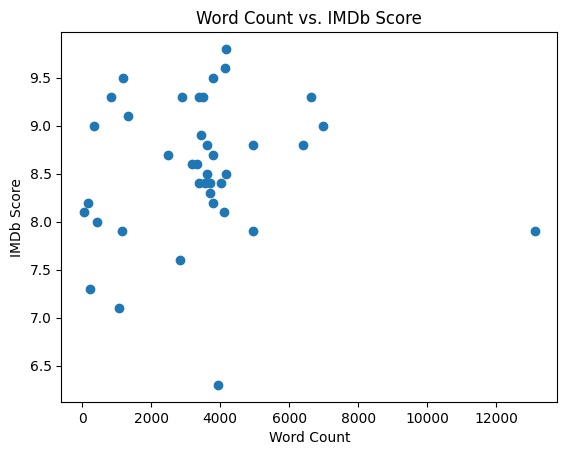

In [ ]:
# Non-linear relationships (Scatter plots)
import matplotlib.pyplot as plt
plt.scatter(episode_data['word_count'], episode_data['IMDb score '])
plt.xlabel("Word Count")
plt.ylabel("IMDb Score")
plt.title("Word Count vs. IMDb Score")
plt.show()

In [ ]:
# Performance across seasons
season_performance = {}
for season in episode_data['Season No'].unique():
    season_data = episode_data[episode_data['Season No'] == season]
    season_features = season_data.drop(['Season No', 'episode no.', 'dialouge', 'IMDb score '], axis=1)
    season_target = season_data['IMDb score ']

    if len(season_features) > 0:
      season_predictions = gb_model.predict(season_features)
      rmse, r2, mae = evaluate_model(season_predictions, season_target)
      season_performance[season] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}

print("\nPerformance per Season:")
for season, metrics in season_performance.items():
    print(f"Season {season}: RMSE={metrics['RMSE']}, R2={metrics['R2']}, MAE={metrics['MAE']}")


Performance per Season:
Season 1: RMSE=0.2777985254165992, R2=0.5849860218862191, MAE=0.11731238156475281
Season 2: RMSE=0.1893190886666153, R2=0.8808849540260628, MAE=0.05991950488367008
Season 3: RMSE=0.49770382787460604, R2=0.4194317962163233, MAE=0.190579475168312
Season 4: RMSE=0.47453084105888677, R2=0.7326364548753972, MAE=0.2740417309727882
Season 5: RMSE=0.7372263555510481, R2=0.524633207592641, MAE=0.39149131095201684


In [ ]:
!pip uninstall gensim -y
!pip install gensim

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
